# Cluster Investigation

v2 - Added NEU lab test

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sb
#!pip install missingno
import missingno as msno
from sklearn import preprocessing as p
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import warnings

%matplotlib inline

color = sb.color_palette("Set2")[0]
palette = sb.color_palette("Set2")

## Gather & Clean Data

In [2]:
df = pd.read_csv('../data/cleaned_data_v2-combined_v2.csv', sep=',', index_col = 0)
df.head()


EDAD  IDINGRESO  TA_MAX_PRIMERA_URG  TA_MIN_PRIMERA_URG  TEMP_PRIMERA_URG  \
0    55        508                   0                   0               0.0   
1    54        509                   0                   0               0.0   
2    73        510                   0                   0               0.0   
3    70        512                   0                   0               0.0   
4    61        513                   0                   0               0.0   

   FC_PRIMERA_URG  SAT_02_PRIMERA_URG  GLU_PRIMERA_URG  CREA--CREATININA  \
0               0                   0                0             0.705   
1               0                   0                0             0.800   
2               0                   0                0             1.056   
3               0                   0                0             0.670   
4               0                   0                0             0.670   

   DD--DIMEROD  LIN--SISTEMATICODESANGRE  NEU--SISTEMATICODESANGRE  \
0   399.000000                     2.290                     3.885   
1   398.000000                     2.355                     4.620   
2  4396.750000                     1.482                     6.082   
3   497.333333                     1.395                     9.175   
4   470.000000                     1.010                     6.220   

   PCR--PROTEINACREACTIVA  PLAQ--SISTEMATICODESANGRE  FEMALE  MALE  DEATH  \
0                6.080000                 472.000000       0     1      0   
1               13.310000                 657.000000       0     1      0   
2                3.760000                 306.000000       0     1      0   
3               21.986667                 278.166667       1     0      0   
4                7.370000                 318.000000       1     0      0   

   RECOVERED  RECOVERY_IN_PROGRESS  
0          1                     0  
1          1                     0  
2          1                     0  
3          0                     1  
4          1                     0

In [3]:
# Start cleaning on copied data
data = df.copy()
data.columns

Index(['EDAD', 'IDINGRESO', 'TA_MAX_PRIMERA_URG', 'TA_MIN_PRIMERA_URG',
       'TEMP_PRIMERA_URG', 'FC_PRIMERA_URG', 'SAT_02_PRIMERA_URG',
       'GLU_PRIMERA_URG', 'CREA--CREATININA', 'DD--DIMEROD',
       'LIN--SISTEMATICODESANGRE', 'NEU--SISTEMATICODESANGRE',
       'PCR--PROTEINACREACTIVA', 'PLAQ--SISTEMATICODESANGRE', 'FEMALE', 'MALE',
       'DEATH', 'RECOVERED', 'RECOVERY_IN_PROGRESS'],
      dtype='object')

In [4]:
# Feature Scaling: Normalize, MinMaxScale
norm_list = data.columns.drop(['IDINGRESO'])
data[norm_list] = p.MinMaxScaler(copy=False).fit_transform(data[norm_list])
data

EDAD  IDINGRESO  TA_MAX_PRIMERA_URG  TA_MIN_PRIMERA_URG  \
0     0.518868        508            0.000000            0.000000   
1     0.509434        509            0.000000            0.000000   
2     0.688679        510            0.000000            0.000000   
3     0.660377        512            0.000000            0.000000   
4     0.575472        513            0.000000            0.000000   
...        ...        ...                 ...                 ...   
2063  0.594340       1786            0.695455            0.101775   
2064  0.716981       1805            0.645455            0.110059   
2065  0.386792       1801            0.536364            0.094675   
2066  0.424528       1803            0.000000            0.000000   
2067  0.688679       1802            0.486364            0.084024   

      TEMP_PRIMERA_URG  FC_PRIMERA_URG  SAT_02_PRIMERA_URG  GLU_PRIMERA_URG  \
0             0.000000        0.000000            0.000000              0.0   
1             0.000000        0.000000            0.000000              0.0   
2             0.000000        0.000000            0.000000              0.0   
3             0.000000        0.000000            0.000000              0.0   
4             0.000000        0.000000            0.000000              0.0   
...                ...             ...                 ...              ...   
2063          0.917706        0.500000            0.000000              0.0   
2064          0.885287        0.352632            0.939394              0.0   
2065          0.955112        0.547368            0.989899              0.0   
2066          0.000000        0.000000            0.000000              0.0   
2067          0.000000        0.621053            0.939394              0.0   

      CREA--CREATININA  DD--DIMEROD  LIN--SISTEMATICODESANGRE  \
0             0.033008     0.003650                  0.023995   
1             0.039407     0.003640                  0.024697   
2             0.056652     0.042876                  0.015262   
3             0.030650     0.004615                  0.014321   
4             0.030650     0.004347                  0.010160   
...                ...          ...                       ...   
2063          0.051533     0.004651                  0.019455   
2064          0.095318     0.025246                  0.010268   
2065          0.050439     0.006280                  0.008971   
2066          0.029303     0.005838                  0.009836   
2067          0.073089     0.004984                  0.010268   

      NEU--SISTEMATICODESANGRE  PCR--PROTEINACREACTIVA  \
0                     0.079099                0.010341   
1                     0.094200                0.023276   
2                     0.124237                0.006190   
3                     0.187784                0.038799   
4                     0.127073                0.012649   
...                        ...                     ...   
2063                  0.083311                0.004419   
2064                  0.106116                0.145648   
2065                  0.062971                0.116343   
2066                  0.056808                0.120315   
2067                  0.166314                0.261401   

      PLAQ--SISTEMATICODESANGRE  FEMALE  MALE  DEATH  RECOVERED  \
0                      0.526973     0.0   1.0    0.0        1.0   
1                      0.737081     0.0   1.0    0.0        1.0   
2                      0.338444     0.0   1.0    0.0        1.0   
3                      0.306833     1.0   0.0    0.0        0.0   
4                      0.352073     1.0   0.0    0.0        1.0   
...                         ...     ...   ...    ...        ...   
2063                   0.235094     1.0   0.0    0.0        1.0   
2064                   0.305508     1.0   0.0    1.0        0.0   
2065                   0.137422     0.0   1.0    0.0        0.0   
2066                   0.293015     1.0   0.0    0.0        0.0   
2067             

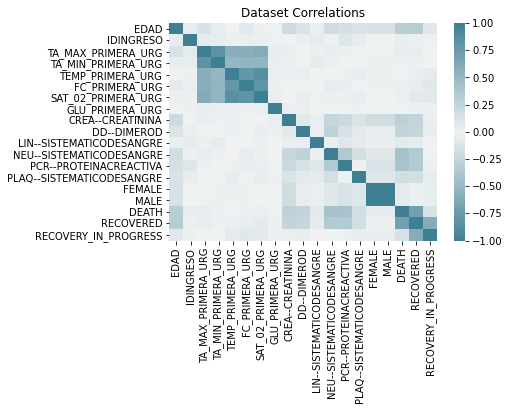

In [5]:
# Correlation Heatmap
cmap = sb.diverging_palette(220, 220, as_cmap=True)
sb.heatmap(data.corr(), cmap = cmap);
plt.title('Dataset Correlations');
plt.savefig('../visualizations/dataset_correlations.png', bbox_inches='tight')

In [6]:
# DEATH correlations
death_corr = data.corr().loc['DEATH'].abs().sort_values(ascending = False)
death_corr = pd.DataFrame(death_corr)
death_corr = death_corr[(death_corr < 1.0) & (death_corr > 0.05)].dropna()
keep_list = death_corr.iloc[1:].index.drop(['RECOVERY_IN_PROGRESS'])
keep_list

Index(['NEU--SISTEMATICODESANGRE', 'PCR--PROTEINACREACTIVA', 'EDAD',
       'CREA--CREATININA', 'DD--DIMEROD', 'PLAQ--SISTEMATICODESANGRE',
       'LIN--SISTEMATICODESANGRE', 'FEMALE', 'MALE', 'TA_MAX_PRIMERA_URG'],
      dtype='object')

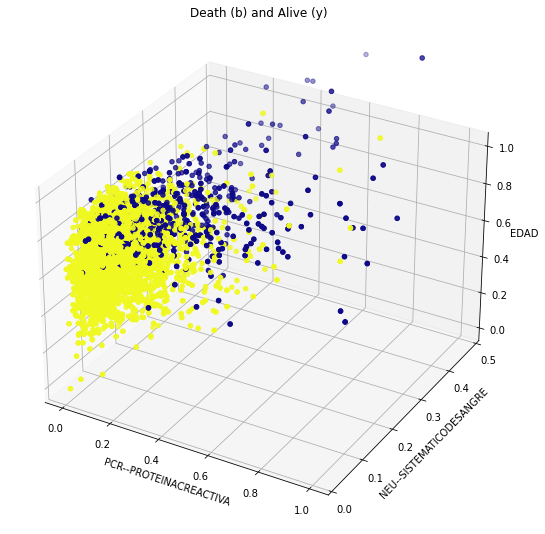

In [7]:
# Visualization Function
from mpl_toolkits.mplot3d import Axes3D

def plot_data(data, labels, keep_list):
    fig = plt.figure(figsize=(7,7));
    ax = Axes3D(fig)
    ax.scatter(data[keep_list[1]], data[keep_list[0]], data[keep_list[2]], c = labels, cmap = 'plasma_r');
    
    ax.set_xlabel(keep_list[1])
    ax.set_ylabel(keep_list[0])
    ax.set_zlabel(keep_list[2])

    plt.ylim([0,0.5])
    
    return 

plot_data(data, data.DEATH, keep_list) # Death
plt.title('Death (b) and Alive (y)')
plt.savefig('../visualizations/cluster_death_v2.png', bbox_inches='tight')

In [8]:
# RECOVERY correlations
rev_corr = data.corr().loc['RECOVERED'].abs().sort_values(ascending = False)
rev_corr = pd.DataFrame(death_corr)
rev_corr = rev_corr[(rev_corr < 1.0) & (rev_corr > 0.05)].dropna()
rev_list = rev_corr.iloc[1:].index.drop(['RECOVERY_IN_PROGRESS'])
rev_list

Index(['NEU--SISTEMATICODESANGRE', 'PCR--PROTEINACREACTIVA', 'EDAD',
       'CREA--CREATININA', 'DD--DIMEROD', 'PLAQ--SISTEMATICODESANGRE',
       'LIN--SISTEMATICODESANGRE', 'FEMALE', 'MALE', 'TA_MAX_PRIMERA_URG'],
      dtype='object')

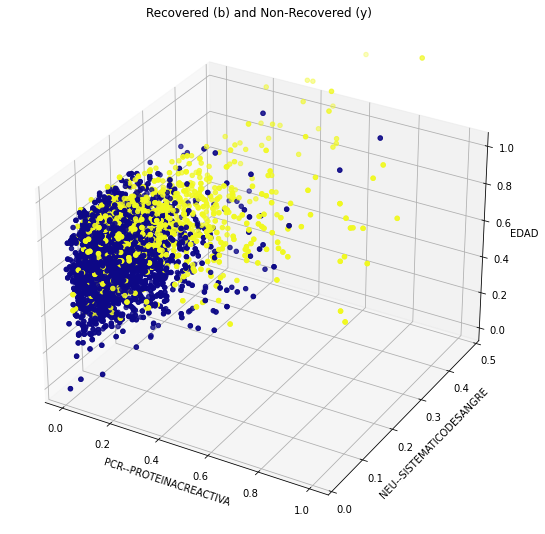

In [9]:
plot_data(data, data.RECOVERED, rev_list) # Recovered
plt.title('Recovered (b) and Non-Recovered (y)')
plt.savefig('../visualizations/cluster_recovered_v2.png', bbox_inches='tight')

In [10]:
# RECOVERY correlations
rip_corr = data.corr().loc['RECOVERED'].abs().sort_values(ascending = False)
rip_corr = pd.DataFrame(rip_corr)
rip_corr = rip_corr[(rip_corr < 1.0) & (rip_corr > 0.05)].dropna()
rip_corr = rip_corr.iloc[1:].index.drop(['RECOVERY_IN_PROGRESS'])
rip_corr

Index(['NEU--SISTEMATICODESANGRE', 'PCR--PROTEINACREACTIVA', 'EDAD',
       'CREA--CREATININA', 'DD--DIMEROD', 'PLAQ--SISTEMATICODESANGRE',
       'SAT_02_PRIMERA_URG', 'LIN--SISTEMATICODESANGRE'],
      dtype='object')

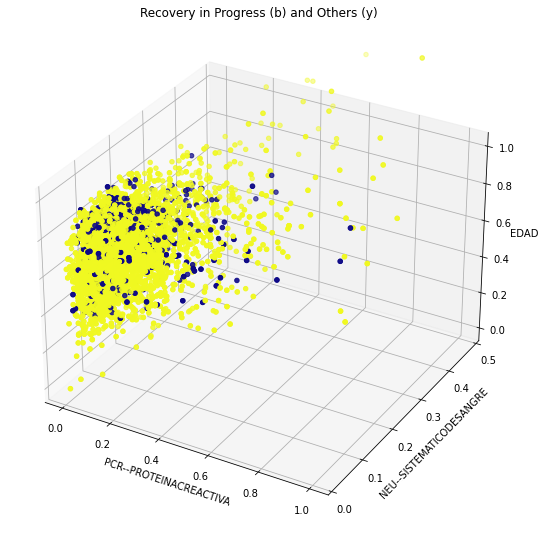

In [11]:
plot_data(data, data.RECOVERY_IN_PROGRESS, rip_corr) # Recovered
plt.title('Recovery in Progress (b) and Others (y)')
plt.savefig('../visualizations/cluster_recovery_in_progress_v2.png', bbox_inches='tight')

## Clustering

In [12]:
# Elbow function
def elbow(data, nr_centers):
    
    '''
    Objective: To find the optimal nr of centers for the data
    Inputs
        data = dataset
        nr_centers = range of nr of centers to test
    returns the score, eg the average distance of the points from the centers
    '''
    
    # Instantinate model
    model = KMeans(nr_centers)
    
    # Fit to data
    fit = model.fit(data)
    
    # Obtain the score for each model
    score = np.abs(model.score(data))
    
    return score

In [13]:
# Columns included
X = data[data.columns.drop(['IDINGRESO', 'DEATH', 'RECOVERED', 'RECOVERY_IN_PROGRESS'])]
list(X.columns)

['EDAD',
 'TA_MAX_PRIMERA_URG',
 'TA_MIN_PRIMERA_URG',
 'TEMP_PRIMERA_URG',
 'FC_PRIMERA_URG',
 'SAT_02_PRIMERA_URG',
 'GLU_PRIMERA_URG',
 'CREA--CREATININA',
 'DD--DIMEROD',
 'LIN--SISTEMATICODESANGRE',
 'NEU--SISTEMATICODESANGRE',
 'PCR--PROTEINACREACTIVA',
 'PLAQ--SISTEMATICODESANGRE',
 'FEMALE',
 'MALE']

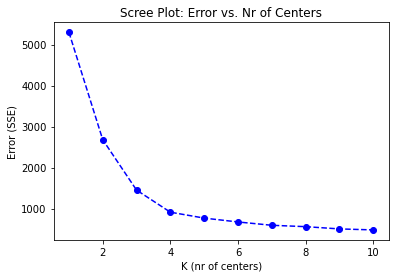

In [14]:
# Elobow method to choose nr of centers
scores =[]
centers = range(1,11)

for i in centers:
    scores.append(elbow(X,i))
    
# Plot the score against k
plt.plot(centers, scores, linestyle='--', marker='o', color='b')
plt.xlabel('K (nr of centers)')
plt.ylabel('Error (SSE)')
plt.title('Scree Plot: Error vs. Nr of Centers')
plt.savefig('../visualizations/scree_plot_v2.png', bbox_inches='tight')

4 Clusters seem to describe the data best - Although all with high errors

In [15]:
# KM Model
nr_clusters = 4

# Instatinate model
model = KMeans(nr_clusters)

# Fit model
fit_model = model.fit(X) # Obs, no train

# Predictions
y_pred = fit_model.predict(X) # Obs, no test

print(f'Model error (SSE): {np.abs(round(fit_model.score(X),0))}')

Model error (SSE): 913.0


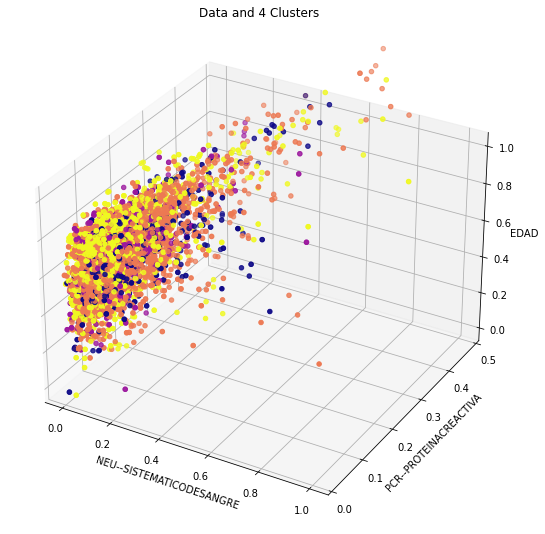

In [19]:
def plot_data(data, labels, keep_list):
    fig = plt.figure(figsize=(7,7));
    ax = Axes3D(fig)
    ax.scatter(data[keep_list[0]], data[keep_list[1]], data[keep_list[2]], c = labels, cmap = 'plasma_r');
    
    ax.set_xlabel(keep_list[0])
    ax.set_ylabel(keep_list[1])
    ax.set_zlabel(keep_list[2])

    plt.ylim([0,0.5])
    
    return 

plot_data(data, y_pred, keep_list) # Recovered
plt.title(f'Data and {nr_clusters} Clusters')
plt.savefig('../visualizations/clusters_v2.png', bbox_inches='tight')